In [1]:
#https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d
import pandas as pd
import wikipedia
articles=['Data Science','Basketball','Swimming','Tokyo', 'Seoul', 'Oven', 'Refrigerator', 'Statistics']
wiki_lst=[]
title=[]
for article in articles:
   print("loading content: ",article)
   wiki_lst.append(wikipedia.page(article).content)
   title.append(article)
print("examine content")

loading content:  Data Science
loading content:  Basketball
loading content:  Swimming
loading content:  Tokyo
loading content:  Seoul
loading content:  Oven
loading content:  Refrigerator
loading content:  Statistics
examine content


In [2]:
print(title)
print(wiki_lst)

['Data Science', 'Basketball', 'Swimming', 'Tokyo', 'Seoul', 'Oven', 'Refrigerator', 'Statistics']
['Data science is an interdisciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from noisy, structured and unstructured data, and apply knowledge and actionable insights from data across a broad range of application domains. Data science is related to data mining, machine learning and big data.\nData science is a "concept to unify statistics, data analysis, informatics, and their related methods" in order to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

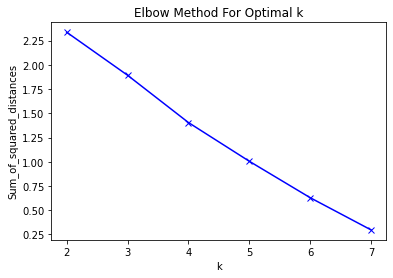

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
#K = range(2,10)
K = range(2,8)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
print(X.size)
print(X)
print(labels)
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

12832
  (0, 5771)	0.005446712669930655
  (0, 5346)	0.007655164611478195
  (0, 5934)	0.006815550150584645
  (0, 470)	0.011430538141960763
  (0, 754)	0.013638990083508303
  (0, 670)	0.00864821774486931
  (0, 4344)	0.006815550150584645
  (0, 6989)	0.005446712669930655
  (0, 6966)	0.013638990083508303
  (0, 1515)	0.013638990083508303
  (0, 1011)	0.027277980167016606
  (0, 4698)	0.013638990083508303
  (0, 3712)	0.013638990083508303
  (0, 6884)	0.013638990083508303
  (0, 5186)	0.007655164611478195
  (0, 5188)	0.009863616553025737
  (0, 6427)	0.005446712669930655
  (0, 1688)	0.011430538141960763
  (0, 1670)	0.013638990083508303
  (0, 5760)	0.007655164611478195
  (0, 5764)	0.007655164611478195
  (0, 2234)	0.013638990083508303
  (0, 7059)	0.007655164611478195
  (0, 3316)	0.006815550150584645
  (0, 6904)	0.019727233106051473
  :	:
  (7, 4558)	0.0047063950946961905
  (7, 5822)	0.0014524934613271115
  (7, 739)	0.009412790189392381
  (7, 4917)	0.3703407756901063
  (7, 5653)	0.004878029010544975
  (

Cluster: 0
Titles
Data Science


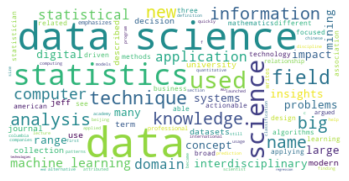

Cluster: 1
Titles
  Basketball
    Swimming
       Seoul
        Oven
Refrigerator
  Statistics


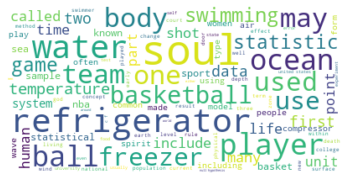

Cluster: 2
Titles
Tokyo


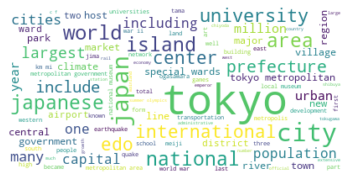

In [6]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()